## EE 461P: Data Science Principles  
### Homework 3 
### Total points: 80
### Due: Thursday, Mar 7, 2023, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. Mervan Can Kaya, mk45596
2. Jacob Dahlkvist, jad7543

### Homework group No.: 

# Q1. - Stochastic Gradient Descent (25 pts)
1. (**5pts**) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model (assuming squared error as your loss function): 
$$ y = w_0 + w_1x_1 + w_2x_1^{2}x_2 + w_3e^{-x_1}+ w_4log(x_3) $$ 

ANSWER:

The update rule for stochastic gradient descent can be expressed as:

$$w^{t+1} = w^t - \alpha \frac{\partial J}{\partial w_j}$$

where $\alpha$ is the learning rate and $J$ is the squared error loss function.

For the given model:

$$y = w_0 + w_1x_1 + w_2x_1^{2}x_2 + w_3e^{-x_1}+ w_4\log(x_3)$$

the squared error loss function is:

$$J = \frac{1}{2}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$


To compute the updates for each coefficient, we need to calculate the partial derivative of the loss function with respect to each coefficient:

$$\frac{\partial J}{\partial w_0} = \sum_{i=1}^{n} (\hat{y}_i - y_i)$$

$$\frac{\partial J}{\partial w_1} = \sum_{i=1}^{n} (\hat{y}i - y_i) x_{1,i}$$

$$\frac{\partial J}{\partial w_2} = \sum_{i=1}^{n} (\hat{y}i - y_i) x_{1,i}^2 x_{2,i}$$

$$\frac{\partial J}{\partial w_3} = \sum_{i=1}^{n} (\hat{y}i - y_i) e^{-x{1,i}}$$

$$\frac{\partial J}{\partial w_4} = \sum_{i=1}^{n} (\hat{y}i - y_i) \log{x_{3,i}}$$

where $\hat{y}_i$ is the predicted value for the ith training example and $y_i$ is the actual value.

Then, we can update the coefficients using the update rule:

$$w_{j}^{t+1} = w_{j}^{t} - \alpha \frac{\partial J}{\partial w_j}$$

where $t$ is the iteration number.

For example, to update $w_0$ at iteration $t$, we use:

$$w_{0}^{t+1} = w_{0}^{t} - \alpha \frac{\partial J}{\partial w_0}$$

and similarly for the other coefficients.


2. (**20pts**) Write Python code for an SGD solution to the non-linear model$$ y = w_0 + w_1x_1 + w_2x_1^{2}x_2 + w_3e^{-x_1}+ w_4log(x_3) $$   Try to format similarly to scikit-learn's models. The template of the class is given. The init function of the class takes as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y. The _predict_ method takes an X value (optionally, an array of values). 

  **a**) Use your new gradient descent regression to predict the data given in ```'samples.csv'```, for 15 epochs, using learning rates: ```[0, .0001, .001, .01, 0.1, 1, 10, 100]``` and regularization (ridge regression) parameters: ```[0,10,100]```. (**13pts**)

  **b**) Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the two best combinations of learning_rate and regularization for SGD. Here "best" means lowest MSE at the end of 15 epochs. (**5pts**)

  ```NOTE``` : In this setting there is no validation/test data, and stopping after a pre-determined number of epochs is an example of an "early stopping" approch to avoid overfitting.(This approach is not ideal, but is sometimes employed in the absence of a validation dataset).

  **c**) Also report the MSE at the end of 15 epochs that you obtained for these two "best" combinations. (**2pts**)


In [14]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.seterr(all='ignore')

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch, plot):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-6
        self.coef = np.zeros(5) 
        self.plot = plot

    
    def sgd(self, gradient):
        self.coef -= self.learning_rate * (gradient + 2 * self.regularization * self.coef)
    
        
    def fit(self, X, y, update_rule='sgd'):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                y_pred = self.linearPredict(X[i])
                error = y[i] - y_pred
                gradient = -error * X[i]
               
                # Update weights
                self.sgd(gradient)

            coefs.append(np.copy(self.coef))
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if self.plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 5))
        x[:,0] = 1
        x[:,1] = (X[:,0])
        x[:,2] = (X[:,0]**2)*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        x[:,4] = np.log(X[:,2])
        
        return x
        
    def linearPredict(self, X):
        return np.dot(X, self.coef)

[('reg', 0, 'rate', 0.1, 'mse', 0.0005626085122109459), ('reg', 0, 'rate', 0.01, 'mse', 0.0016649291666159726)]


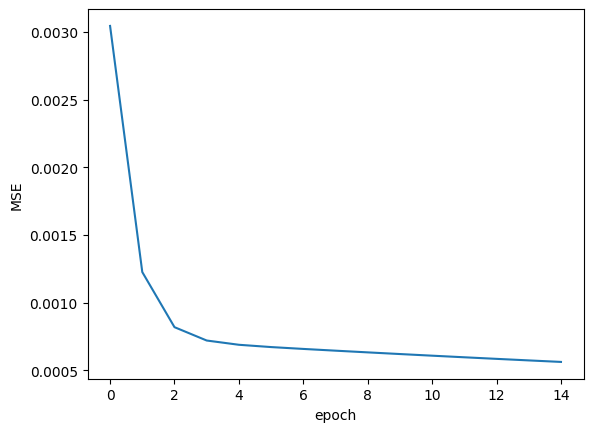

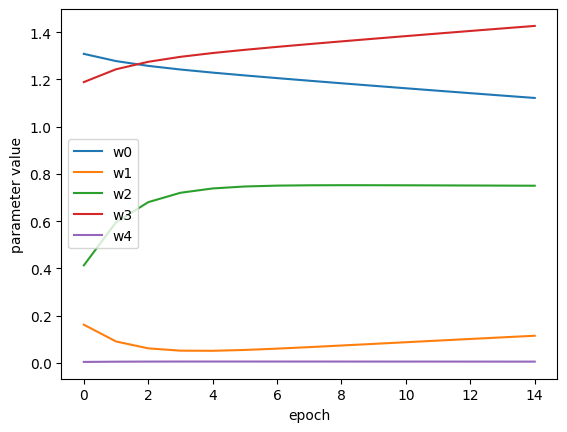

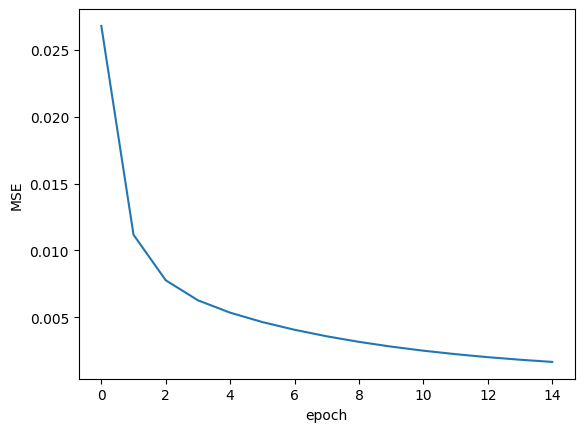

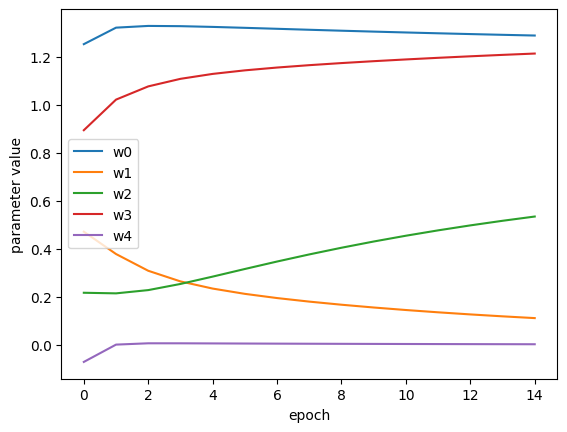

In [15]:
df = pd.read_csv("samples.csv",index_col=0)
X = np.array([df['x1'].values, df['x2'].values,df['x3'].values]).T
y = df['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]
results = []

for rate in learning_rate:
    for reg_value in regularization:
        reg = Regression(rate, reg_value, n_epochs, False)
        reg.fit(X, y)
        result = 'reg', reg_value, 'rate', rate, 'mse', reg.lowest_mse
        results.append(result)

sorted_list = sorted(results, key=lambda x: x[5])
results = sorted_list[:2]

for param in results:
    reg = Regression(param[3], param[1], n_epochs, True)
    reg.fit(X, y)

print(results)
    



# Q2. Neural Network Basics (10 points)

1.1 Can a multi-layered neural network with only linear activation functions in all hidden layers be represented as a neural network without any hidden layer? Explain your answer. (5 points)

ANSWER:

If a multi-layered neural network is comprised of only linear activation functions in all hidden layers, it is possible to represent the network as a neural network without any hidden layer.
This is due to the fact that a linear activation function produces a linear combination of its inputs, resulting in each layer's output being expressed as a linear function of the input to that layer. When multiple linear layers are arranged in sequence, the resultant function can be represented as a single linear function.
As a consequence, a neural network with solely linear activation functions in all hidden layers can be presented as a single-layer neural network, featuring a linear activation function at the output layer. Since the combination of linear functions remains a linear function, the final output of the neural network can be expressed as a linear function of the input.

To summarize, it is possible to represent a neural network with only linear activation functions in all hidden layers as a neural network without any hidden layer since each hidden layer's output is a linear function of its inputs, and the combination of linear functions is also a linear function.

1.2 Suppose you are solving a problem for image datasets using neural networks. You are wondering if you should use neural network with fully-connected layers or a convolutional neural network. Which one do you think is better suited for this task and why? (Read up on convolutional neural networks if we have not covered this in class by due date). (5 points)

ANSWER:

When it comes to solving problems with image datasets, convolutional neural networks (CNNs) are generally preferred over neural networks with fully-connected layers.
This is because CNNs are specifically designed to handle high-dimensional inputs, such as images, by taking advantage of the spatial correlations between neighboring pixels. They employ convolutional layers that apply filters to specific regions of the input image, extracting important features and reducing the dimensionality of the data. This is followed by pooling layers that further reduce the size of the input data while retaining crucial features.
In contrast, neural networks with fully-connected layers are better suited for low-dimensional data such as tabular or time-series data, where the relationships between the features are less dependent on their spatial arrangement.
Furthermore, CNNs can learn hierarchical representations of the image data, starting with low-level features such as edges and corners, and progressing to more complex features such as textures and shapes. This allows them to capture a richer set of features from the input data, which is often vital for tasks such as image classification or object detection.

To summarize, for image datasets, CNNs are the better choice due to their ability to handle high-dimensional inputs, exploit spatial correlations, and learn hierarchical representations of the data.



Solution

# Q3. MLP Regression with Pytorch (30 points)
Pytorch provides extensive built-in functions useful for developing and training neural networks. In this exercise, we will try to build a Multi-layer Perceptron for a regression problem.


2.1 Dataset : Download the diabetes dataset from sklearn.datasets. Divide this dataset into train and test sets with 75% of data in train and 25% in test with random_seed = 42. To use this dataset with Pytorch we need to convert it to a pytorch compatible dataset, which is an object of the torch.utils.Dataset class. Use the class below to convert this diabetes dataset to a torch.utils.Dataset object. (5 points)

In [16]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [17]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
class DatasetCustom(torch.utils.data.Dataset):
  def __init__(self, X, y):
      self.X = torch.from_numpy(X)
      self.y = torch.from_numpy(y)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]

In [19]:
train_dataset = DatasetCustom(X_train, y_train)
test_dataset = DatasetCustom(X_test, y_test)

2.2 Pytorch uses DataLoader class to load and iterate over a dataset for learning. Create a DataLoader object from the pytorch compatible dataset generated above with batchsize = 64 and shuffle = True. You can read more about Pytorch's Dataset and DataLoader [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). (5 points)

In [20]:
test_dataloader_64 = DataLoader(test_dataset, batch_size=64, shuffle=True)
train_dataloader_64 = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataloader_1 = DataLoader(test_dataset, batch_size=1, shuffle=True)
train_dataloader_1 = DataLoader(train_dataset, batch_size=1, shuffle=True)

2.3 Network Design : Create a python class for a neural network with the following architecture:

   a) MLP : Linear layer (input_dim=10, output_dim = 4) followed by a ReLu layer and another linear layer (input_dim=4, output_dim = 1).

Pytorch [layers](https://pytorch.org/docs/stable/nn.html) are described here. The individual layers are stacked inside [Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential). 

Each class implements an init() method that defines the network and a forward method that performs the operations defined under the network. See the example below for a 3-layer neural network. (5 points)


In [21]:
class MLP(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(10, 4),
            nn.ReLU(),
            nn.Linear(4, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

In [22]:
class Example(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(784, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    return self.layers(x)

2.4 Training : Train the above defined neural network using SGD optimizer with learning rate = 0.0001 for 50 epochs while minimizing for the MSELoss. (10 points) 

In [23]:
# Initialize the network
net = MLP()

loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)
losses = []
for epoch in range(0, 50): 
    if epoch % 100 == 0:
      print(f'Epoch {epoch}')
    loss = 0.0
    optimizer.zero_grad()
    batch_loss = []
    # Iterate over the DataLoader for training data
    for i, data in enumerate(train_dataloader_64):
      inputs, targets = data
      inputs = inputs.to(torch.float32)
      targets = targets.to(torch.float32)
      # Predict for inputs using net
      outputs = net(inputs)
      # Compute loss for predictions wrt targets
      loss = loss_function(outputs, targets)
      batch_loss.append(loss.detach().numpy())
      # Call backward on loss
      loss.backward()
      # Call step on optimizer
      optimizer.step()
    losses.append(np.mean(batch_loss))

Epoch 0


/opt/homebrew/Caskroom/miniforge/base/envs/HW1/lib/python3.10/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/opt/homebrew/Caskroom/miniforge/base/envs/HW1/lib/python3.10/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([11])) that is different to the input size (torch.Size([11, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [24]:
# Initialize the network
net = MLP()

loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)
losses_1 = []

for epoch in range(0, 50): 
    if epoch % 100 == 0:
      print(f'Epoch {epoch}')
    loss = 0.0
    optimizer.zero_grad()
    batch_loss = []
    # Iterate over the DataLoader for training data
    for i, data in enumerate(train_dataloader_1):
      inputs, targets = data
      inputs = inputs.to(torch.float32)
      targets = targets.to(torch.float32)
      # Predict for inputs using net
      outputs = net(inputs)
      # Compute loss for predictions wrt targets
      loss = loss_function(outputs, targets)
      batch_loss.append(loss.detach().numpy())
      # Call backward on loss
      loss.backward()
      # Call step on optimizer
      optimizer.step()
    losses_1.append(np.mean(batch_loss))

Epoch 0


/opt/homebrew/Caskroom/miniforge/base/envs/HW1/lib/python3.10/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


2.4 Plot the epoch loss (average of losses in all batches in one epoch) vs epoch when you set batch size = 64. In another figure, plot for epoch loss when you set batch size = 1. What do you observe? (5 points)

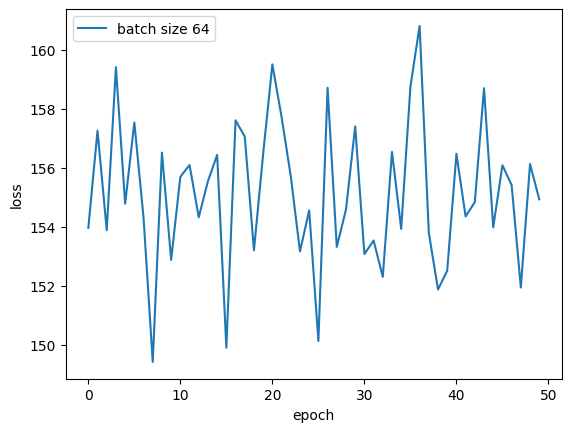

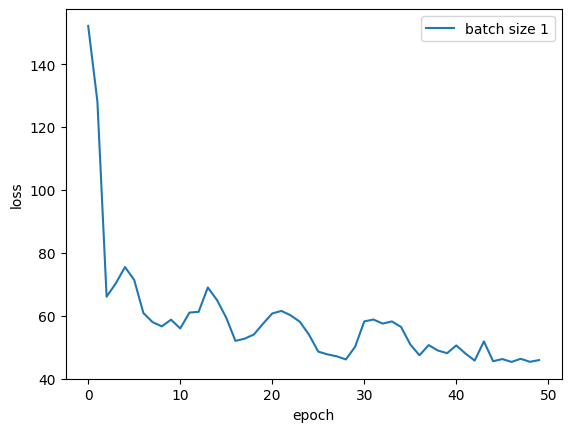

In [25]:
plt.figure()
plt.plot(range(50), losses, label='batch size 64')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.figure()
plt.plot(range(50), losses_1, label='batch size 1')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()




#Question 4: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons, .

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

ANSWER:

Tanh:
    Test-0.193
    Train-0.186

Linear:
    Test-0.507
    Train-0.495

According to the reported losses, the model utilizing the Tanh activation function outperforms the model using the Linear activation function, both in terms of the training and test sets. This suggests that the Tanh activation function is better suited for this specific problem. In terms of decision boundaries,the Tanh model will generate more non-linear decision boundaries while the Linear model will produce more linear ones. This is due to the non-linearity of the Tanh activation function, which allows the model to capture more intricate relationships between input and output variables. Conversely, the Linear activation function can only capture linear relationships, limiting its capacity to capture complex relationships, such as the dataset used in this problem.

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

4 neurons:
    Test-0.042
    Train-0.012

8 neurons:
    Test-0.036
    Train-0.009

The neural network with 8 neurons in the hidden layer produced more complex decision boundaries compared to the one with 4 neurons. This is because increasing the number of neurons in the hidden layer increases the representational capacity of the neural network, allowing it to capture more complex and non-linear relationships between the input and output variables.

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers?

Learning rate...

10:
    100 epochs
        Test-0.794
        Train-0.848
    1000 epochs
        Test-0.797
        Train-0.848

1:
    100 epochs
        Test-0.198
        Train-0.171
    1000 epochs
        Test-0.197
        Train-0.171

0.1:
    100 epochs
        Test-0.007
        Train-0.004
    1000 epochs
        Test-0.001
        Train-0.000

0.01:
    100 epochs
        Test-0.509
        Train-0.496
    1000 epochs
        Test-0.205
        Train-0.179

0.001:
    100 epochs
        Test-0.497
        Train-0.508
    1000 epochs
        Test-0.497
        Train-0.474

By analyzing the changes in the test and train losses over different values of learning rates and epoch numbers, some patterns emerge. For high learning rates (10), the model struggles to converge and produces high losses even after 1000 epochs. When the learning rate is reduced to 1, the model performs much better with significantly lower losses, indicating that a more moderate learning rate is more suitable for this problem. Further reduction of the learning rate to 0.1 and 0.01 results in even lower losses, with the latter achieving the best results after 1000 epochs. However, when the learning rate is decreased to 0.001, the model is unable to learn the problem effectively, resulting in high losses. Overall, it can be seen that finding the optimal learning rate is crucial for achieving good performance. Increasing the number of epochs generally improves the model's performance, as can be observed by comparing the losses obtained after 100 and 1000 epochs for all learning rates.

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

ANSWER:

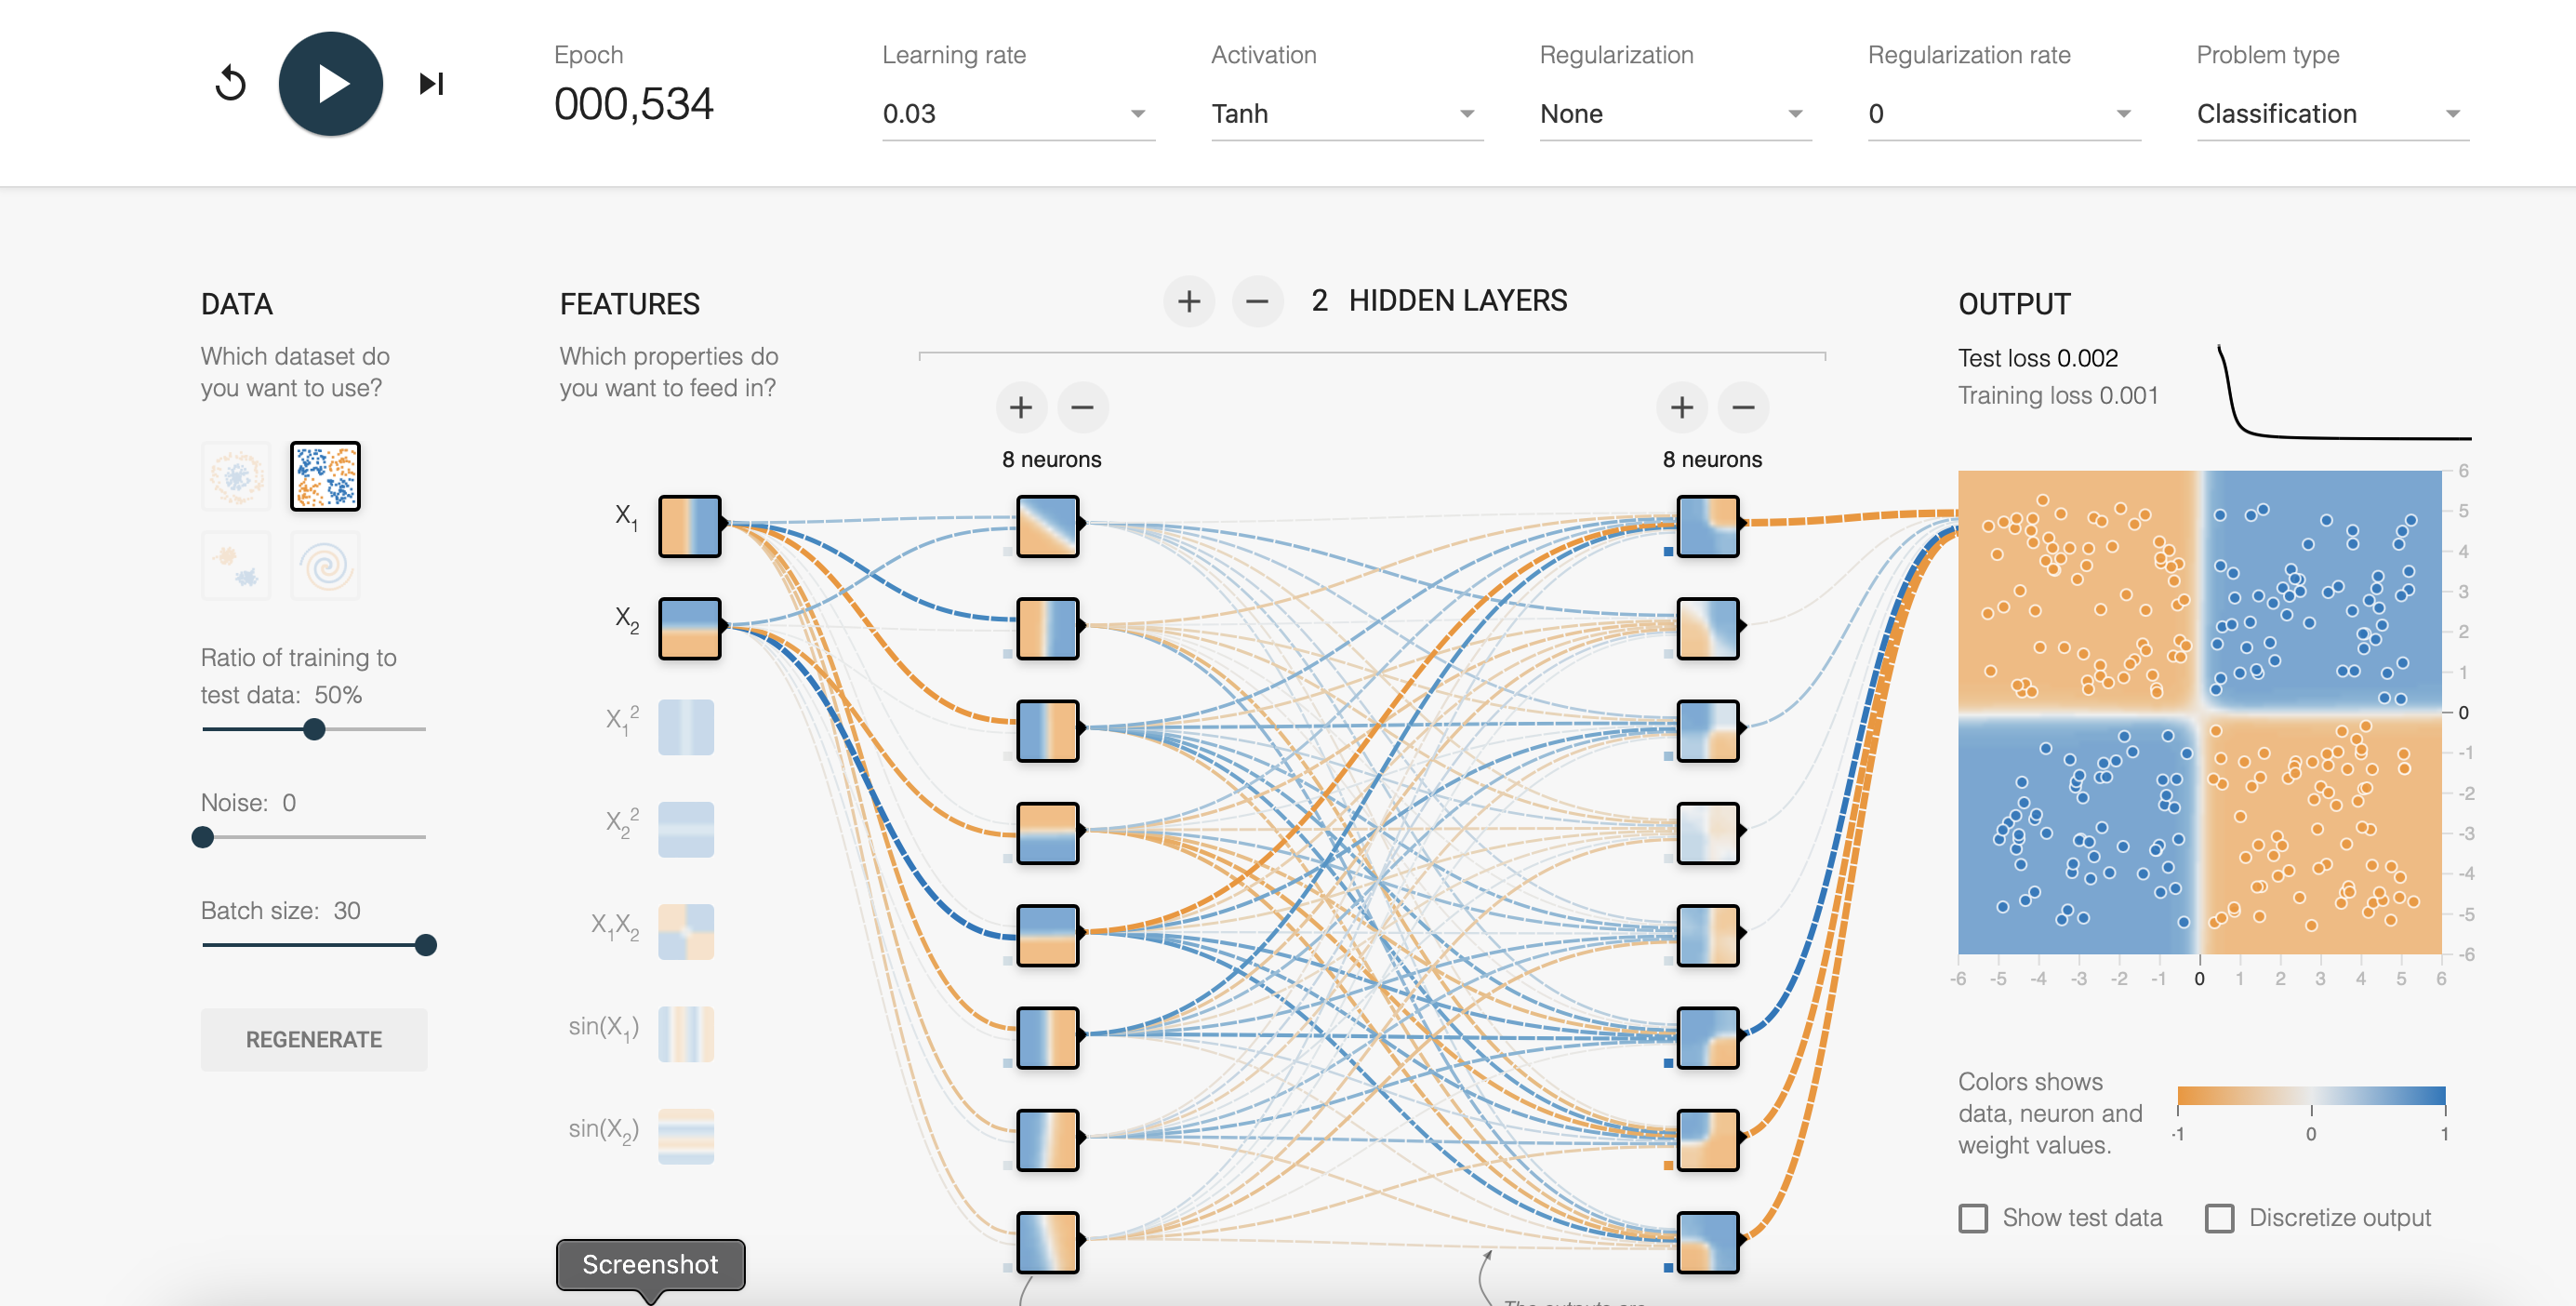

In [26]:
from IPython import display
display.Image("output.png")